In [1]:
!nvidia-smi

Sun Jan 16 06:16:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install keras-tuner

     |████████████████████████████████| 98 kB 4.1 MB/s 


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
print(tf.__version__)

2.7.0


In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [10]:
for i in range(10):
  print(train_labels[i])

9
0
0
3
0
2
7
2
5
5


In [11]:
train_images = train_images/255.0
test_images = test_images/255.0

In [8]:
import matplotlib.pyplot as plt

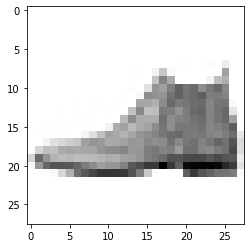

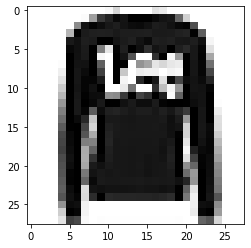

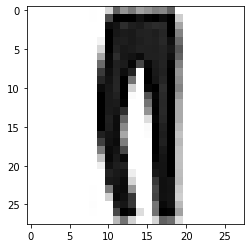

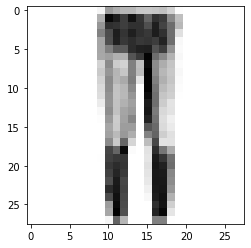

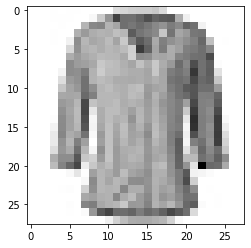

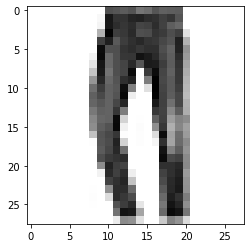

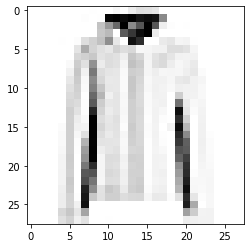

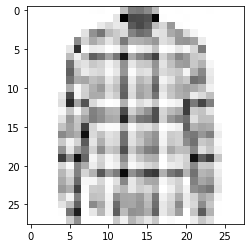

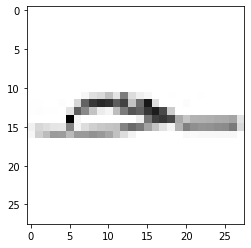

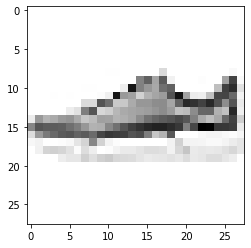

In [12]:
for i in range(10):
  plt.imshow(test_images[i], cmap = 'Greys')
  plt.show()

In [13]:
train_images[0].shape

(28, 28)

In [14]:
train_images = train_images.reshape(len(train_images),28,28,1)
test_images = test_images.reshape(len(test_images),28,28,1)
train_images[0].shape

(28, 28, 1)

In [15]:
def build_model(hp):
    model = keras.Sequential([
      keras.layers.Conv2D(
          filters = hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
          kernel_size = hp.Choice('conv_1_kernel', values = [3,5]),
          activation = 'relu',
          input_shape = (28,28,1)
      ),
      keras.layers.Conv2D(
          filters = hp.Int('conv_1_filter', min_value=32, max_value=64, step=16),
          kernel_size = hp.Choice('conv_1_kernel', values = [3,5]),
          activation = 'relu'
      ),
      keras.layers.Flatten(),
      keras.layers.Dense( units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16), activation='relu'),
      keras.layers.Dense(10, activation='softmax')                          
    ])
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice("Learning_Rate",[1e-2,1e-3])), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [16]:
from keras_tuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [17]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='output_1',
    project_name='CNNOptimizer')

In [18]:
tuner.search(train_images, train_labels, epochs=3, validation_split=0.4)

Trial 10 Complete [00h 00m 21s]
val_accuracy: 0.8967083096504211

Best val_accuracy So Far: 0.9079999923706055
Total elapsed time: 00h 04m 37s
INFO:tensorflow:Oracle triggered exit


In [19]:
model = tuner.get_best_models(num_models=1)[0]

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 48)                3538992   
                                                                 
 dense_1 (Dense)             (None, 10)                490       
                                                                 
Total params: 3,688,346
Trainable params: 3,688,346
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(train_images,train_labels, validation_split=0.4, epochs=50, initial_epoch=3)

Epoch 4/50
1125/1125 [==============================] - 10s 9ms/step - loss: 0.1519 - accuracy: 0.9436 - val_loss: 0.2779 - val_accuracy: 0.9113
Epoch 5/50
1125/1125 [==============================] - 9s 8ms/step - loss: 0.1110 - accuracy: 0.9595 - val_loss: 0.3222 - val_accuracy: 0.9036
Epoch 6/50
1125/1125 [==============================] - 9s 8ms/step - loss: 0.0785 - accuracy: 0.9713 - val_loss: 0.3274 - val_accuracy: 0.9055
Epoch 7/50
1125/1125 [==============================] - 10s 9ms/step - loss: 0.0575 - accuracy: 0.9788 - val_loss: 0.4038 - val_accuracy: 0.9043
Epoch 8/50
1125/1125 [==============================] - 9s 8ms/step - loss: 0.0374 - accuracy: 0.9866 - val_loss: 0.4457 - val_accuracy: 0.9057
Epoch 9/50
1125/1125 [==============================] - 10s 9ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.5430 - val_accuracy: 0.8995
Epoch 10/50
1125/1125 [==============================] - 10s 9ms/step - loss: 0.0282 - accuracy: 0.9899 - val_loss: 0.5561 - val_accu

In [22]:
y = model.predict(test_images)

In [24]:
y[1]

array([3.6609982e-25, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       3.6115384e-30, 0.0000000e+00, 5.6201579e-31, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [25]:
import numpy as np
y_pred = np.argmax(y, axis=1)

In [28]:
for i in range(10):
  print(y_pred[i])

9
2
1
1
6
1
4
4
5
7
